# PROJET Numérique : lignes de niveau

L'objectif de ce projet est de développer un programme Python permettant de calculer les lignes de niveau d'une fonction f de deux variables réelles et à valeurs réelles (supposée continuement différentiable).

In [7]:
#importation de toutes les bibliothèques nécessaires

from autograd import numpy as np
import autograd
import math
import matplotlib.pyplot as plt
from numpy.linalg import norm

Pour obtenir ce résultat nous avons réalisé plusieurs étapes.
Premièrement, la réalisation de la fonction find_seed qui doit renvoyer un point dont l'abscisse est 0 et l'ordonnée est entre 0 et 1.
Nous avons choisi de réaliser cette fonction à l'aide d'une dichotomie.

In [8]:
def find_seed(g,c=0,eps=2**(-26)):
    a=0
    b=1
    if (g(a)-c)*(g(b)-c)>0:
        return None
    while (b-a)>eps:
        t=(b+a)/2
        if (g(a)-c)*(g(t)-c)<=0:
            b=t
        else:
            a=t
    return t

Dans un deuxième temps, nous devions réaliser une fonction simple_contour qui renvoie le tracé d'une ligne de niveau de valeur c dans un carré de côté 1 entre les points (0,0), (0,1), (1,0) et (1,1).
Pour cela, nous avons choisi d'utiliser une méthode avec l'utilisation du gradient. Le gradient est toujours orthogonal a la ligne de niveau, on prend donc l'orthgonal au gradient (que l'on nommera tang) que l'on choisi orienté vers la droite (condition composante sur x supérieure à 0 de ce vecteur). Puis, on prend un pas de 0,01 le long de ce vecteur ce qui nous donne un nouveau point. 
Le problème de cette méthode est qu'a chaque point que l'on prend on rajoute une erreur, cette méthode diverge donc.

In [21]:
def simple_contour1(f,c=0,delta=0.01):
    X=[]
    Y=[]
    x0=0.
    h=lambda x:f(x0,x)
    if find_seed(h,c)==None:
        return X,Y
    Y.append(find_seed(h,c))
    X.append(0.)
    g = autograd.grad
    gr=np.r_[g(f, 0)(X[-1],Y[-1]), g(f, 1)(X[-1],Y[-1])]
    tang=[-gr[1],gr[0]]
    if tang[0]<0:
        while X[-1]<1 and 0<Y[-1]<1:
            g = autograd.grad
            gr=np.array(np.r_[g(f, 0)(X[-1],Y[-1]), g(f, 1)(X[-1],Y[-1])])
            gr *= delta/norm(gr)
            tang=np.array([gr[1],-gr[0]])
            X.append(X[-1] + tang[0])
            Y.append(Y[-1] + tang[1])
    else:
        while X[-1]<1 and 0<Y[-1]<1:
            g = autograd.grad
            gr=np.array(np.r_[g(f, 0)(X[-1],Y[-1]), g(f, 1)(X[-1],Y[-1])])
            gr *= delta/norm(gr)
            tang=np.array([-gr[1],gr[0]])
            X.append(X[-1] + tang[0])
            Y.append(Y[-1] + tang[1])
    return [X,Y]

Afin de régler ce problème de divergence, nous avons utiliser une dichotomie angulaire sur un cercle de rayon 0,01 à partir du point précédent. De cette façon, on limite l'erreur induite par le décalage entre la courbe réelle et la tangente.

In [10]:
def simple_contour2(f,c=0,delta=0.01):
    X=[]
    Y=[]
    x0=0.
    h=lambda x:f(x0,x)
    if find_seed(h,c)==None:
        return X,Y
    Y.append(find_seed(h,c))
    X.append(0.)
    g = autograd.grad
    gr=np.r_[g(f, 0)(X[-1],Y[-1]), g(f, 1)(X[-1],Y[-1])]
    tang=[-gr[1],gr[0]]
    if tang[0]<0:
        while X[-1]<1 and 0<Y[-1]<1:
            g = autograd.grad
            gr=np.array(np.r_[g(f, 0)(X[-1],Y[-1]), g(f, 1)(X[-1],Y[-1])])
            gr *= delta/norm(gr)
            tang=np.array([-gr[1],gr[0]])
            coord = lambda angle : np.cos(angle)*gr + np.sin(angle)*tang
            a = - np.pi
            b = np.pi
            eps = 2**(-26)
            while(b-a > eps) :
                d = (a+b)/2
                if (f((X[-1]+coord(a)[0]),Y[-1]+coord(a)[1])-c)*(f((X[-1]+coord(d)[0]),Y[-1]+coord(d)[1])-c)<0:
                    b=d
                else:
                    a=d
            X.append(X[-1] + coord(d)[0])
            Y.append(Y[-1] + coord(d)[1])
    else:
        while X[-1]<1 and 0<Y[-1]<1:
            g = autograd.grad
            gr=np.array(np.r_[g(f, 0)(X[-1],Y[-1]), g(f, 1)(X[-1],Y[-1])])
            gr *= delta/norm(gr)
            tang=np.array([gr[1],-gr[0]])
            tang = tang*0.01/norm(tang)
            coord = lambda angle : np.cos(angle)*gr + np.sin(angle)*tang
            a = - np.pi
            b = np.pi
            eps = 2**(-26)
            while(b-a > eps) :
                d = (a+b)/2
                if (f((X[-1]+coord(a)[0]),Y[-1]+coord(a)[1])-c)*(f((X[-1]+coord(d)[0]),Y[-1]+coord(d)[1])-c)<0:
                    b=d
                else:
                    a=d
            X.append(X[-1] + coord(d)[0])
            Y.append(Y[-1] + coord(d)[1])
    return [X,Y]

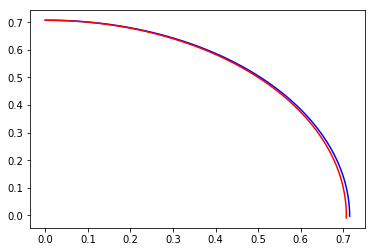

In [22]:
L=simple_contour1(h,0.5)
M=simple_contour2(h,0.5)
plt.plot(L[0],L[1],color='b')
plt.plot(M[0],M[1],color='r')
plt.show()


Afin d'obtenir toutes les courbes de niveaux sur une surface donnée, nous avons utilisé les fonctions qui nous étaient fournies. Les rotations qui nous ramènent dans un carré où notre fonction simple_contour fonctionne. Puis, avec la fonction contour on réalise les courbes de niveaux totales.

In [12]:
LEFT, UP, RIGHT, DOWN = 0, 1, 2, 3  # clockwise


def rotate_direction(direction, n=1):
    return (direction + n) % 4


def rotate(x, y, n=1):
    if n == 0:
        return x, y
    elif n >= 1:
        return rotate(1 - y, x, n - 1)
    else:
        assert n < 0
        return rotate(x, y, n=-3 * n)


def rotate_function(f, n=1):
    def rotated_function(x, y):
        xr, yr = rotate(x, y, -n)
        return f(xr, yr)

    return rotated_function


# Complex Contouring
# ------------------------------------------------------------------------------

# Customize the simple_contour function used in contour :
# simple_contour = smart_simple_contour


def contour(f, c, xs=[0.0, 1.0], ys=[0.0, 1.0], delta=0.01):
    curves = []
    nx, ny = len(xs), len(ys)
    for i in range(nx - 1):
        for j in range(ny - 1):
            xmin, xmax = xs[i], xs[i + 1]
            ymin, ymax = ys[j], ys[j + 1]

            def f_cell(x, y):
                return f(xmin + (xmax - xmin) * x, ymin + (ymax - ymin) * y)

            done = set()
            for n in [0, 1, 2, 3]:
                if n not in done:
                    rotated_f_cell = rotate_function(f_cell, n)
                    x_curve_r, y_curve_r = simple_contour2(rotated_f_cell, c, delta)
                    exit = None
                    if len(x_curve_r) >= 1:
                        xf, yf = x_curve_r[-1], y_curve_r[-1]
                        if xf == 0.0:
                            exit = LEFT
                        elif xf == 1.0:
                            exit = RIGHT
                        elif yf == 0.0:
                            exit = DOWN
                        elif yf == 1.0:
                            exit = UP
                    if exit is not None:  # a fully successful contour fragment
                        exit = rotate_direction(exit, n)
                        done.add(exit)

                    x_curve, y_curve = [], []
                    for x_r, y_r in zip(x_curve_r, y_curve_r):
                        x, y = rotate(x_r, y_r, n=-n)
                        x_curve.append(x)
                        y_curve.append(y)
                    x_curve = np.array(x_curve)
                    y_curve = np.array(y_curve)
                    curves.append(
                        (xmin + (xmax - xmin) * x_curve, ymin + (ymax - ymin) * y_curve)
                    )
    return curves

Voici le résultat de notre travail avec la fonction demandée.

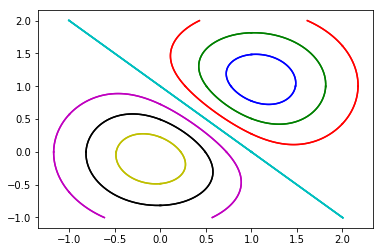

In [19]:
def g(x,y):
    return np.exp(-x**2-y**2)
def h(x,y):
    return x**2+y**2

def l(x,y):
    return np.exp(-(x-1)**2-(y-1)**2)

def fonction(x,y):
    return 2*(g(x,y)-l(x,y))  

niveaux = [-1.5,-1.,-0.5,0.,0.5,1.,1.5]

for i in range (len(niveaux)):
    level=contour(fonction,niveaux[i],[-2.,-1.,0.,1.,2.,3.],[-1.,0.,1.,2.])
    couleurs = ['b','g','r','c','m','k','y']
    for x,y in level:
        plt.plot(x,y,color = couleurs[i])
plt.show()